<a href="https://colab.research.google.com/github/stratnaparkhi026/EDA-project-Airbnb-Booking-Analysis/blob/main/EDA_project_Airbnb_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/project/Copy of Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df = airbnb_df.drop_duplicates()
airbnb_df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [ ]:
total_null = airbnb_df.isnull().sum().sum()
print("total null values in dataset: ",total_null)

total null values in dataset:  20141


In [ ]:
nan_count = airbnb_df.isna().sum()
print(nan_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Out of these four columns three of them contains object or string as a datatype. So it is better to remove all the rows having null values.
airbnb_df.dropna(subset=['name','host_name',"last_review","reviews_per_month"], inplace=True)

In [ ]:
# Lets check whether the null-values are removed or not.
print(airbnb_df.isna().sum())
print(airbnb_df.shape)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
(38821, 16)


<ipython-input-17-4e58f11002fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(airbnb_df.corr(), dtype=bool))
<ipython-input-17-4e58f11002fc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(data = airbnb_df.corr(), mask = mask, annot = True, cmap = cmap, fmt='.2f')


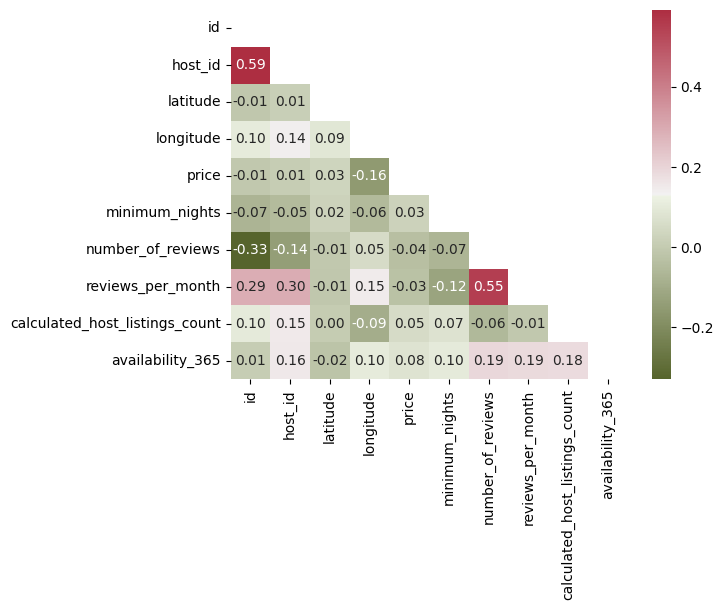

In [ ]:
# Lets check correlation between the columns.
mask = np.triu(np.ones_like(airbnb_df.corr(), dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
hm = sns.heatmap(data = airbnb_df.corr(), mask = mask, annot = True, cmap = cmap, fmt='.2f')
plt.show()

In [ ]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
# Airbnb_df.nunique(['id','name','host_name','neighbourhood_group','neighbourhood'], inplace=True)
print("id: ", airbnb_df['id'].nunique())
print("name: ", airbnb_df['name'].nunique())
print("host_name: ", airbnb_df['host_name'].nunique())
print('neighbourhood:', airbnb_df['neighbourhood'].nunique())
print("neighbourhood_group: ", airbnb_df['neighbourhood_group'].nunique())

id:  38821
name:  38253
host_name:  9885
neighbourhood: 218
neighbourhood_group:  5


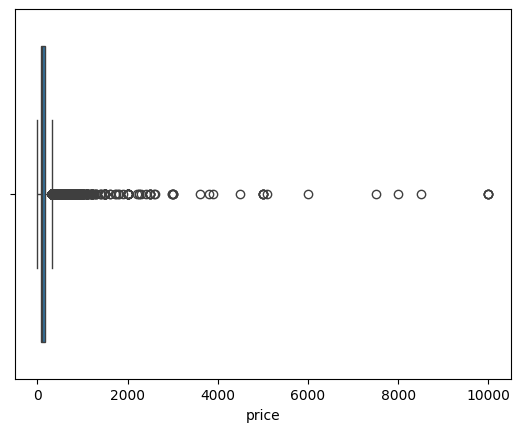

In [ ]:
sns.boxplot(x = airbnb_df['price'])
plt.show()

In [ ]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

shape of the dataset before removing outlier: (38821, 16)
shape of the dataset after removing outlier: (36744, 16)


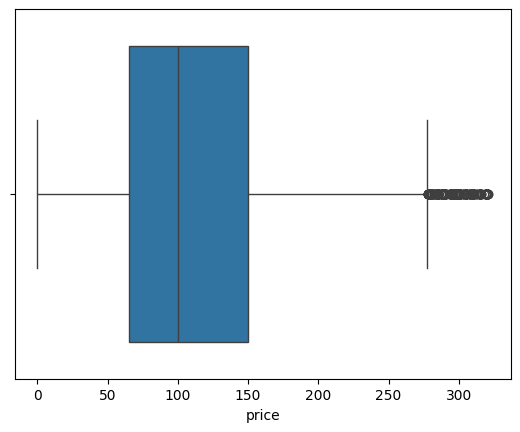

In [ ]:
lower_bound,upper_bound=iqr_technique(airbnb_df['price'])

airbnb_df1 = airbnb_df[(airbnb_df.price>lower_bound) & (airbnb_df.price<upper_bound)]
# print("\nOutliers detected using IQR Outlier Removal: ",Airbnb_df['price'])

# so the outliers are removed from price column now check with boxplot and also check shape of new Dataframe!

sns.boxplot(x = airbnb_df1['price'])
print("shape of the dataset before removing outlier:", airbnb_df.shape)
print("shape of the dataset after removing outlier:", airbnb_df1.shape)


##**Question 1) Distribution Of Airbnb Bookings Price Range.**

**We can notice that the price column has minimum price as 0, which is surprising as price 0 does'nt make sense to do bussiness. so to overcome this problem Lets fill the column of price having price as 0 with appropriate price values (by filling the price with median price for each room_type)**

In [ ]:
# Lets fill '0' with median price for each room type.
airbnb_df1.loc[ (airbnb_df1.room_type=='Entire home/apt') & (airbnb_df1.price==0),'price']=airbnb_df1.loc[ (airbnb_df1.room_type=='Entire home/apt') & (airbnb_df1.price!=0),'price'].median()
airbnb_df1.loc[ (airbnb_df1.room_type=='Private room') & (airbnb_df1.price==0),'price']=airbnb_df1.loc[ (airbnb_df1.room_type=='Private room') & (airbnb_df1.price!=0),'price'].median()
airbnb_df1.loc[ (airbnb_df1.room_type=='Shared room') & (airbnb_df1.price==0),'price']=airbnb_df1.loc[ (airbnb_df1.room_type=='Shared room') & (airbnb_df1.price!=0),'price'].median()
airbnb_df1.shape # after updating price column

(36744, 16)

In [ ]:
airbnb_df1.to_csv('Air.csv')

<ipython-input-23-83c56b3de144>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_df1['price'],color=('r'))


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

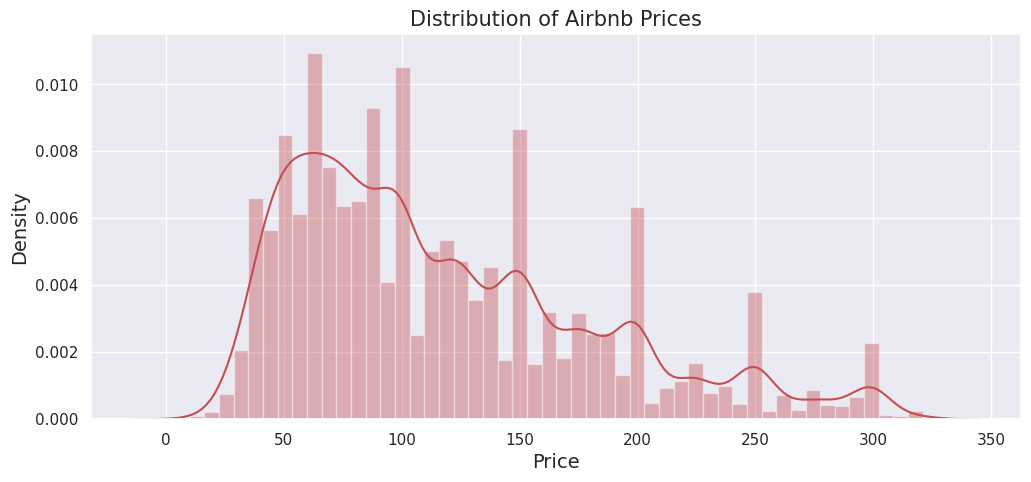

In [ ]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(airbnb_df1['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

### **Observations -->**

### The range of prices being charged on Airbnb appears to be from 20 to 330 dollars , with the majority of listings falling in the price range of 50 to 150 dollars.

### The distribution of prices appears to have a peak in the 50 to 150 dollars range, with a relatively lower density of listings in higher and lower price ranges.

### There may be fewer listings available at prices above 250 dollars, as the density of listings drops significantly in this range.

## **Question 2) Heighest number of apartments owned by the host.**

In [ ]:
airbnb_df1['host_name'].value_counts().reset_index().head(10)


,index,host_name
0,Michael,309
1,David,285
2,John,236
3,Alex,203
4,Sarah,174
5,Maria,168
6,Sonder (NYC),164
7,Daniel,161
8,Jessica,156
9,Anna,153


Text(0.5, 1.0, 'Top hosts(not distinct) with highest number of listings on Airbnb')

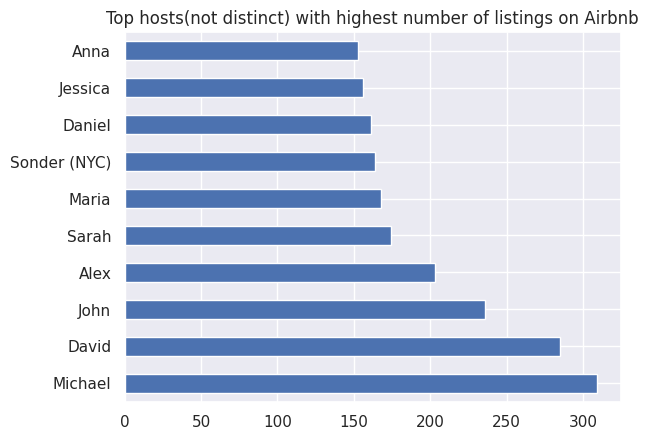

In [ ]:
airbnb_df1['host_name'].value_counts()[:10].plot(kind='barh')
plt.title('Top hosts(not distinct) with highest number of listings on Airbnb')

In [ ]:
airbnb_df1["host_id"].value_counts().reset_index().head(10)

,index,host_id
0,219517861,164
1,61391963,79
2,16098958,57
3,137358866,51
4,7503643,49
5,190921808,44
6,1475015,42
7,22541573,39
8,120762452,39
9,2119276,37


Text(0.5, 1.0, 'Top host_id with highest number of listings on Airbnb')

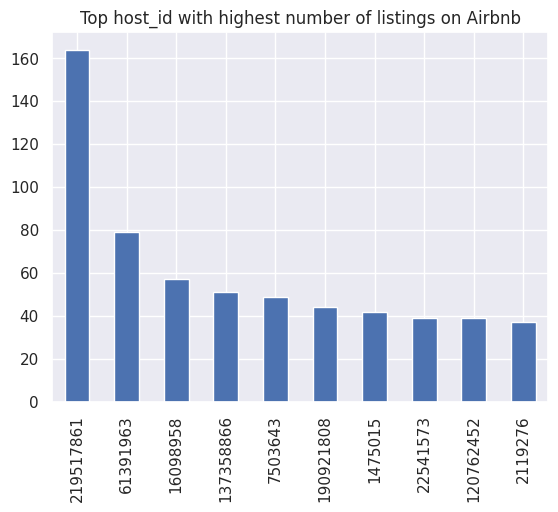

In [ ]:
airbnb_df1['host_id'].value_counts()[:10].plot.bar()
plt.title('Top host_id with highest number of listings on Airbnb')

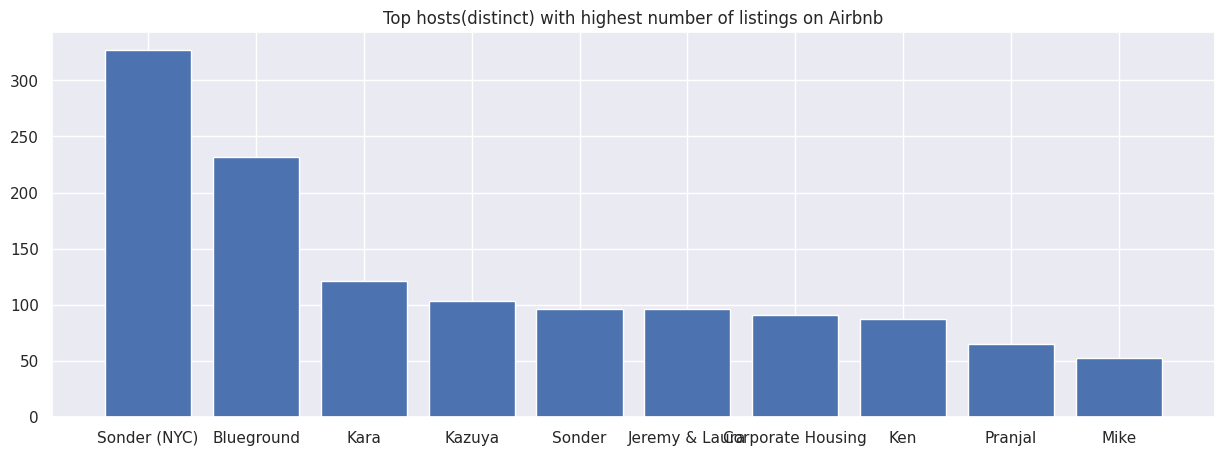

In [ ]:
top_host=airbnb_df1.groupby(['host_id','host_name'])['calculated_host_listings_count'].max().sort_values(ascending=False).head(10).reset_index()
h_name = top_host['host_name'].head(10)
count = top_host['calculated_host_listings_count'].head(10)
# Figure Size
fig = plt.figure(figsize =(15, 5))
# Horizontal Bar Plot
plt.bar(h_name[0:10], count[0:10])
# Show Plot
plt.title("Top hosts(distinct) with highest number of listings on Airbnb")
plt.show()

**From this, we can see that the host_name Michael it's appearing 417 times in the host_name column, so this might imply that Michael is having the highest number of rooms. But from the host_id column, it shows the highest appearance of any host_id is 327, so this implies that there can be multiple people that may have the same name that's why we are getting different highest appearance in host_name as compared to host_id.**
**bold text**


**Lets check which host_name is actually having heighest number of appartments.**

In [ ]:
airbnb_df1[airbnb_df1['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

In [ ]:
df_sonder=airbnb_df1[airbnb_df1['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(6)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446
39772,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616


So **Sonder (NYC)** is having maximum numbers of rooms for the guest and having multiple appartments in same building in different different neighbourhood, for Airbnb he might be very important person then.



## **Question 3) Which are the top 10 neighbourhood having maximum number of appartments on airbnb ?**

In [ ]:
airbnb_df1['neighbourhood'].value_counts().head(10)

Bedford-Stuyvesant    3082
Williamsburg          3008
Harlem                2145
Bushwick              1919
East Village          1391
Hell's Kitchen        1380
Upper West Side       1358
Upper East Side       1329
Crown Heights         1228
East Harlem            917
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top neighbourhoods with highest number of listings')

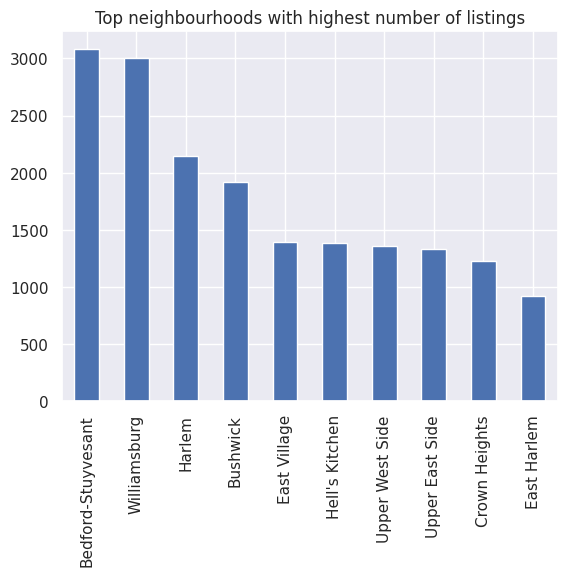

In [ ]:
# Plotting top 10 neighbourhood which are having maximum number of appartments on Airbnb

pd.value_counts(airbnb_df1['neighbourhood'])[:10].plot.bar()
plt.title("Top neighbourhoods with highest number of listings")

Bedford-Stuyvesant and Williamsburg are the top neighbourhoods having maximum number of properties on airbnb

## **Question 4) Which are top 3 neighbourhood in each group having maximum price amongst their respective neighbourhood group?**

In [ ]:
# Dataframe of each neighbourhood group
df_manhattan=airbnb_df1[airbnb_df1['neighbourhood_group']=='Manhattan']
df_queens=airbnb_df1[airbnb_df1['neighbourhood_group']=='Queens']
df_brooklyn=airbnb_df1[airbnb_df1['neighbourhood_group']=='Brooklyn']
df_bronx=airbnb_df1[airbnb_df1['neighbourhood_group']=='Bronx']
df_staten=airbnb_df1[airbnb_df1['neighbourhood_group']=='Staten Island']

In [ ]:
# Top 3 neighbourhoods in Manhattan which are having maximum prices
print('Top 3 neighbourhoods in Manhattan which are having maximum prices ')
df_manhattan.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhoods in Manhattan which are having maximum prices 


,neighbourhood,price
0,Financial District,321
1,Chelsea,321
2,Hell's Kitchen,320


In [ ]:
# Top 3 neighbourhoods in Staten Island which are having maximum prices
print('Top 3 neighbourhoods in Staten Island which are having maximum prices')
df_staten.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhoods in Staten Island which are having maximum prices


,neighbourhood,price
0,Grymes Hill,300
1,Tottenville,299
2,Castleton Corners,299


In [ ]:
# top 3 neighbourhoods in bronx which are having maximum prices
print('Top 3 neighbourhoods in Bronx which are having maximum prices')
df_bronx.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhoods in Bronx which are having maximum prices


,neighbourhood,price
0,Wakefield,309
1,Parkchester,300
2,Clason Point,300


In [ ]:
# top 3 neighbourhoods in Queens which are having maximum prices
print('Top 3 neighbourhoods in Queens which are having maximum prices')
df_queens.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhoods in Queens which are having maximum prices


,neighbourhood,price
0,Long Island City,320
1,Arverne,300
2,Elmhurst,300


In [ ]:
# top 3 neighbourhoods in brooklyn which are having maximum prices
print('Top 3 neighbourhood in Brooklyn which are having maximum prices')
df_brooklyn.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in Brooklyn which are having maximum prices


,neighbourhood,price
0,Bushwick,320
1,Williamsburg,320
2,Prospect Heights,320


**Financial District, Chelsea and Long Island City are the neighbourhoods which have costliest listing in NYC.**

## **Question 5) How neighbourhood is related to reviews ?**

### **Top 5 Neighbourhoods having highest reviews per month**

In [ ]:
airbnb_df1.groupby(['neighbourhood'])['reviews_per_month'].sum().sort_values(ascending=False).reset_index().head()

,neighbourhood,reviews_per_month
0,Bedford-Stuyvesant,4793.90
1,Williamsburg,3277.69
2,Harlem,2898.34
3,Bushwick,2601.75
4,Hell's Kitchen,2468.48


### **Top 5 Neighbourhoods having highest number of reviews**


In [ ]:
airbnb_df1.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head()

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,108600
1,Williamsburg,81070
2,Harlem,74614
3,Bushwick,52095
4,Hell's Kitchen,46895


**Bedford-Stuyvesant neighbourhood has highest number of total reviews and highest number of reviews_per_month.**

## **Question 6) What is the distribution of the room type and its distribution over the location ?**

<Axes: title={'center': 'Total number of listings across each room_type'}>

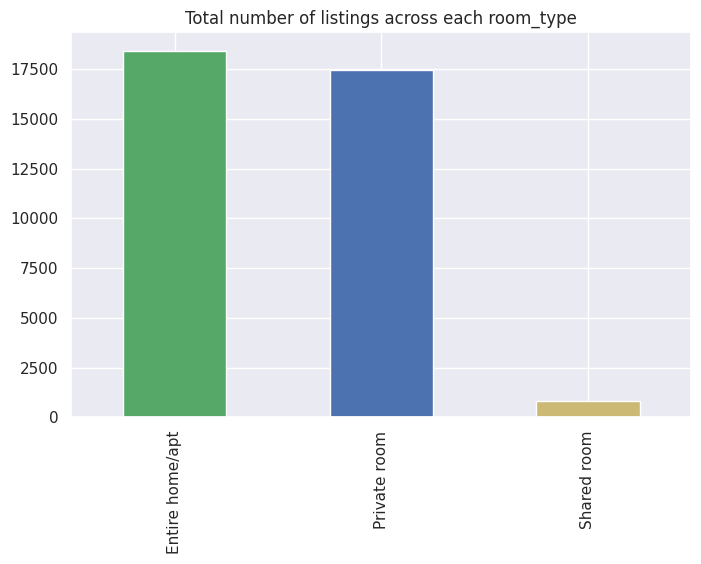

In [ ]:
# Room type distribution
plt.figure(figsize=(8,5))
plt.title("Total number of listings across each room_type")
airbnb_df1['room_type'].value_counts().plot(kind='bar',color=['g','b','y'])

### **So we can notice the following**
### 1)That maximum number of rooms are Entire home/Apartment and Private room, there are only few shared rooms.
### 2)So mostly hosts prefer to give Entire home/Appartment or Private Rooms rather than shared rooms.
**Lets see how room_type is distributed over all location ,is there any place where there is a dominance of any particular room_type over the others despite of thier overall ratios ?**

## **Scatter plot**

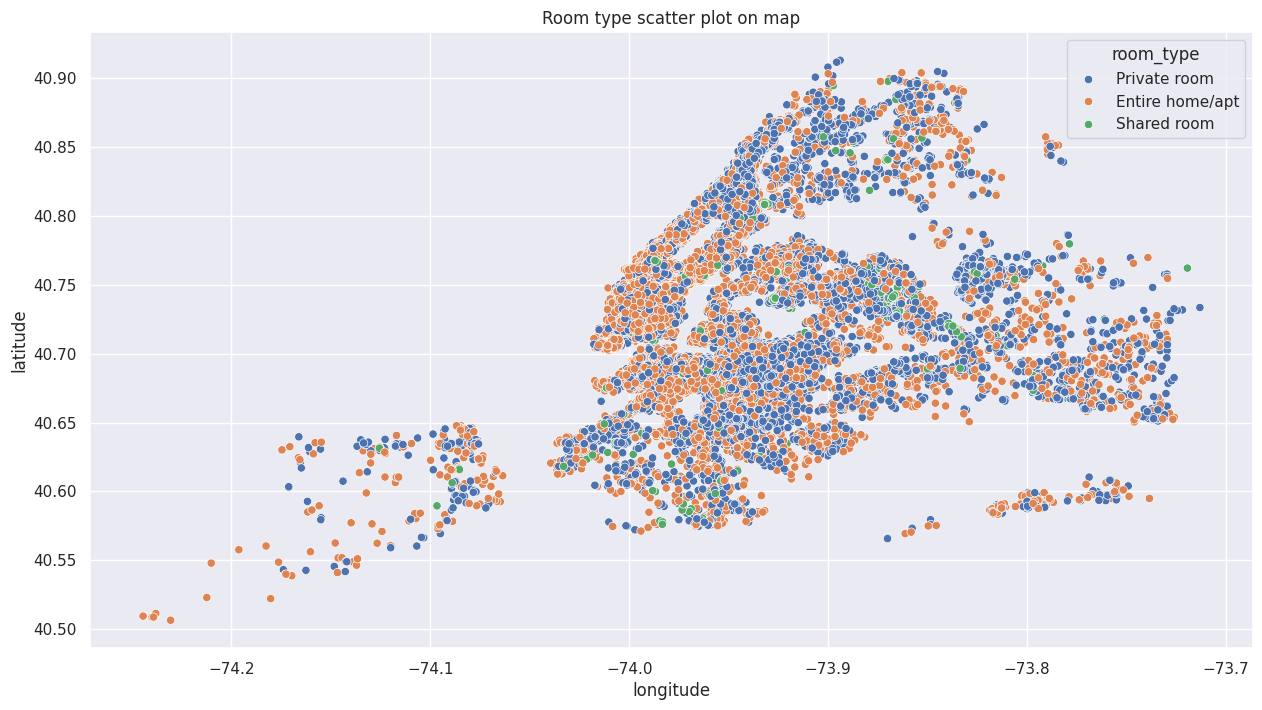

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=airbnb_df1['longitude'],y=airbnb_df1['latitude'], hue=airbnb_df1['room_type']).set(title='Room type scatter plot on map')
plt.show()

## **Question 7) How is the room_type distributed over the neighbourhood_group, are the ratios of respective room_types more or less same over each neighbourhood_group ?**

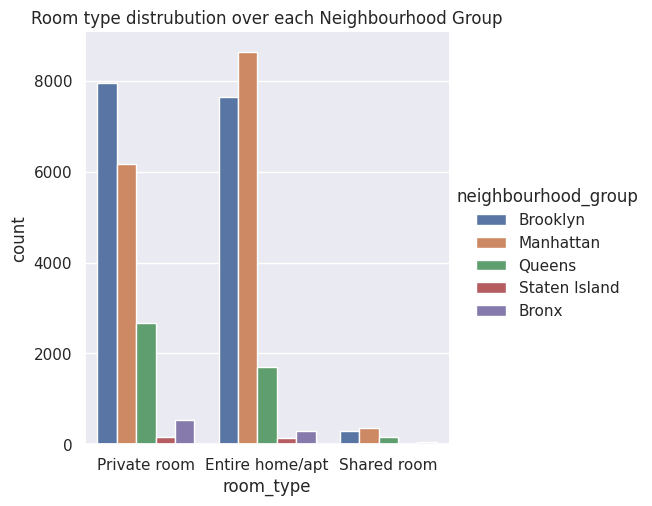

In [ ]:
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=airbnb_df1).set(title='Room type distrubution over each Neighbourhood Group')
plt.show()

## **Question 8) Number Of Active Hosts Per Location.**

In [ ]:
# create a new DataFrame that displays the number of hosts in each neighborhood group in the Airbnb NYC dataset
hosts_per_location = airbnb_df1.groupby('neighbourhood_group')['id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']

# display the resulting DataFrame
hosts_per_location


,Neighbourhood_Groups,Host_counts
0,Bronx,864
1,Brooklyn,15891
2,Manhattan,15171
3,Queens,4506
4,Staten Island,312


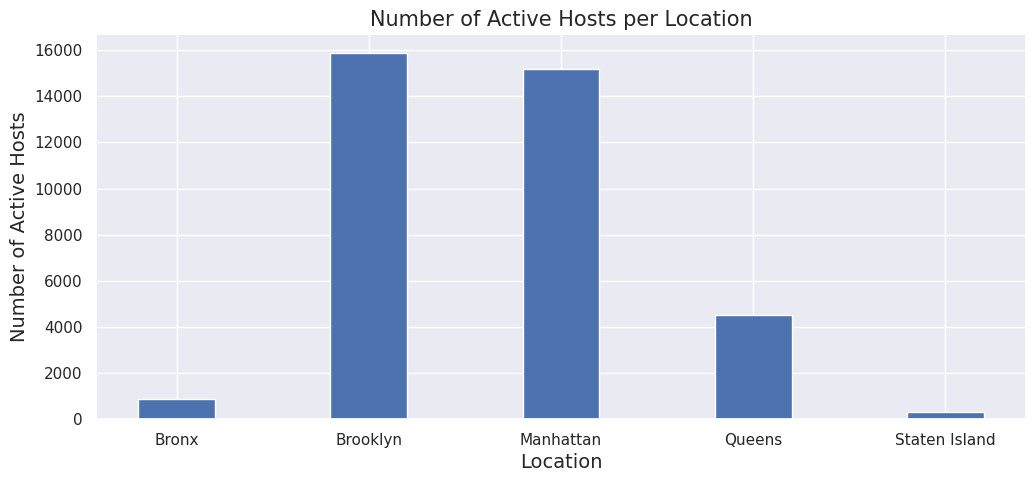

In [ ]:
# Group the data by neighbourhood_group and count the number of listings for each group
hosts_per_location = airbnb_df1.groupby('neighbourhood_group')['id'].count()

# Get the list of neighbourhood_group names
locations = hosts_per_location.index

# Get the list of host counts for each neighbourhood_group
host_counts = hosts_per_location.values

# Set the figure size
plt.figure(figsize=(12, 5))

# Create the line chart with some experiments using marker function
plt.bar(locations, host_counts, width = 0.4)

# Add a title and labels to the x-axis and y-axis
plt.title('Number of Active Hosts per Location', fontsize='15')
plt.xlabel('Location', fontsize='14')
plt.ylabel('Number of Active Hosts', fontsize='14')

# Show the plot
plt.show()

### **Observations -->**
### *   Brooklyn has the largest number of hosts with 15891, Manhattan has the second largest number of hosts with 15171.
### *   Brooklyn and Manhattan have the largest number of hosts, with more than double the number of hosts in Queens and more than 18 times the number of hosts in the Bronx.

## **Question 9) Stay Requirement counts by Minimum Nights**

In [ ]:
# Group the DataFrame by the minimum_nights column and count the number of rows in each group
min_nights_count = airbnb_df1.groupby('minimum_nights').size().reset_index(name = 'count')

# Sort the resulting DataFrame in descending order by the count column
min_nights_count = min_nights_count.sort_values('count', ascending=False)

# Select the top 10 rows
min_nights_count = min_nights_count.head(15)

# Reset the index
min_nights_count = min_nights_count.reset_index(drop=True)

# Display the resulting DataFrame
min_nights_count


,minimum_nights,count
0,2,9799
1,1,9487
2,3,6341
3,4,2549
4,5,2251
5,30,2196
6,7,1391
7,6,555
8,14,364
9,10,327


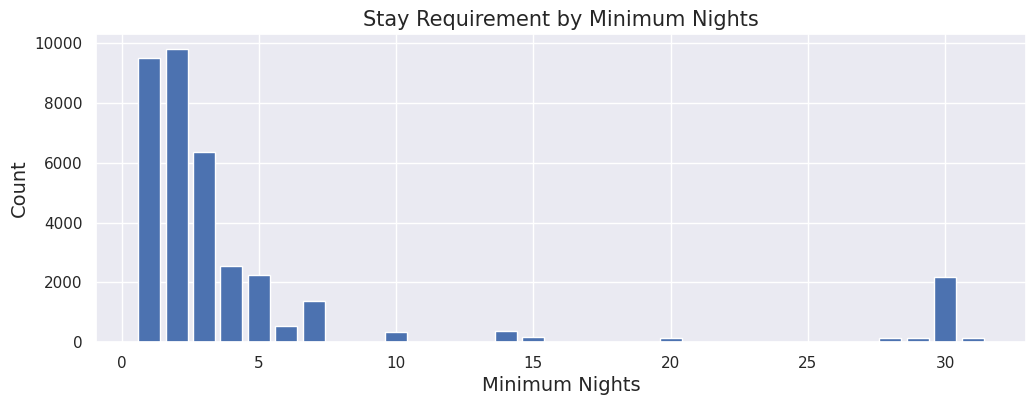

In [ ]:
# Extract the minimum_nights and count columns from the DataFrame
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the bar plot
plt.bar(minimum_nights, count)

# Add axis labels and a title
plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')

# Show the plot
plt.show()

### **Observations -->**
### *   The majority of listings on Airbnb have a minimum stay requirement of 1 or 2 nights, with 9487 and 9799 listings, respectively.
### *   The number of listings with a minimum stay requirement decreases as the length of stay increases, with 6341 listings requiring a minimum stay of 3 nights, and so on.

## **Question 10) What is the average price preferred by customers according to the neighbourhood_group for each category of room_type?**

In [ ]:
# applying groupby over 'neighbourhood_groups' and 'room_type'
# then applying mean of price  and unstacking for clear visualization

avg_price_df = airbnb_df1.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,110.553691,57.225191,39.238095
Brooklyn,146.193569,69.278330,44.543253
Manhattan,176.428952,95.949814,72.332386
Queens,129.228402,63.873266,41.939597
Staten Island,119.939189,57.584906,57.600000


Text(0.5, 1.0, 'Average price for each room_type according to each neighbourhood group')

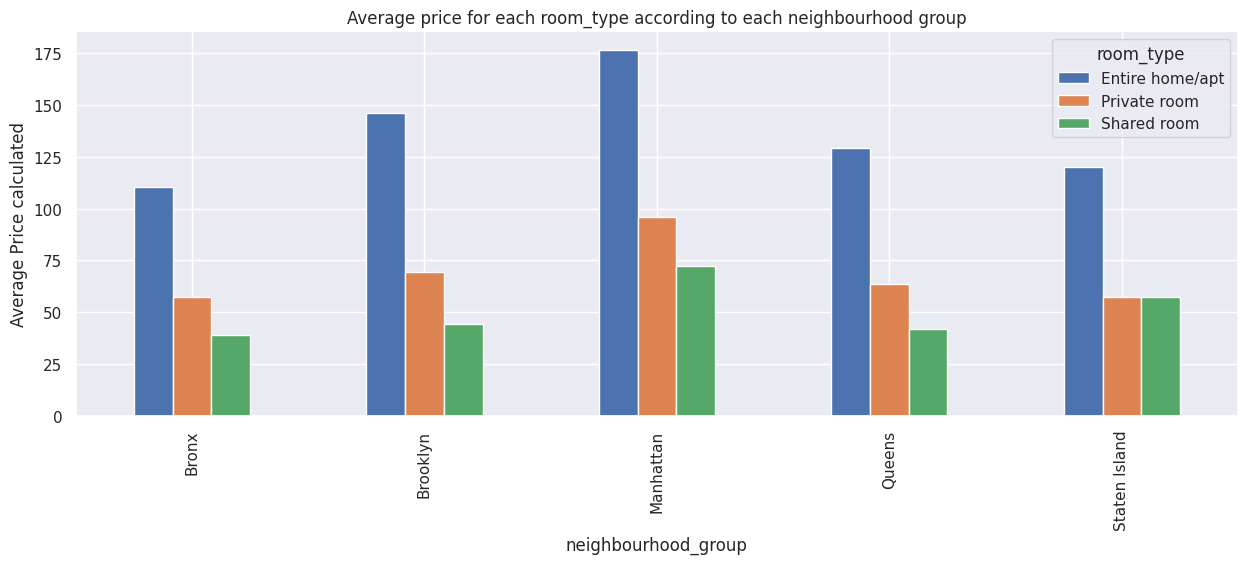

In [ ]:
avg_price_df.plot.bar(figsize=(15,5),ylabel='Average Price calculated')
plt.title("Average price for each room_type according to each neighbourhood group")

### **Observations: As we can see that manhattan is most costly and bronx is cheap for each room_type**
### **But I think we can make it more useful for business implementation if we do some analysis on successfull hosts according to the highest no of reviews so that we can suggest this price to our hosts for getting good business.**

## **Question 11) What is the average price preferred for getting good number_of_reviews according to neighbourhood_group ?**

In [ ]:
# creating a different Dataframe df_succesfull_host on the actual airbnb_df1 Dataframe on the basis of highest number of reviews
# first sorted the dataframe on basis of number_of_reviews and room_type and applied groupby on neighbourhood,room_type
# then selected neighbourhood_group, number_of_reviews, room_type and price

df_succesfull_hosts=airbnb_df1.sort_values(by=['room_type','number_of_reviews'],ascending=False).groupby(['neighbourhood_group','room_type'])['neighbourhood_group','room_type','number_of_reviews','price'].head(10)
# now applying groupby on df_succesfull_hosts by neighbourhood_group and room_type then calculating average price for respected grouby objcet

avg_preffered_price_df=df_succesfull_hosts.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

<ipython-input-50-2755fb8353d8>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_succesfull_hosts=airbnb_df1.sort_values(by=['room_type','number_of_reviews'],ascending=False).groupby(['neighbourhood_group','room_type'])['neighbourhood_group','room_type','number_of_reviews','price'].head(10)


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,87.1,48.1,45.1
Brooklyn,162.2,75.5,38.7
Manhattan,160.1,80.5,56.9
Queens,88.3,50.0,44.5
Staten Island,97.9,50.6,57.6


Text(0.5, 1.0, 'Average price for each room_type according to neighbourhood group for getting good number of reviews')

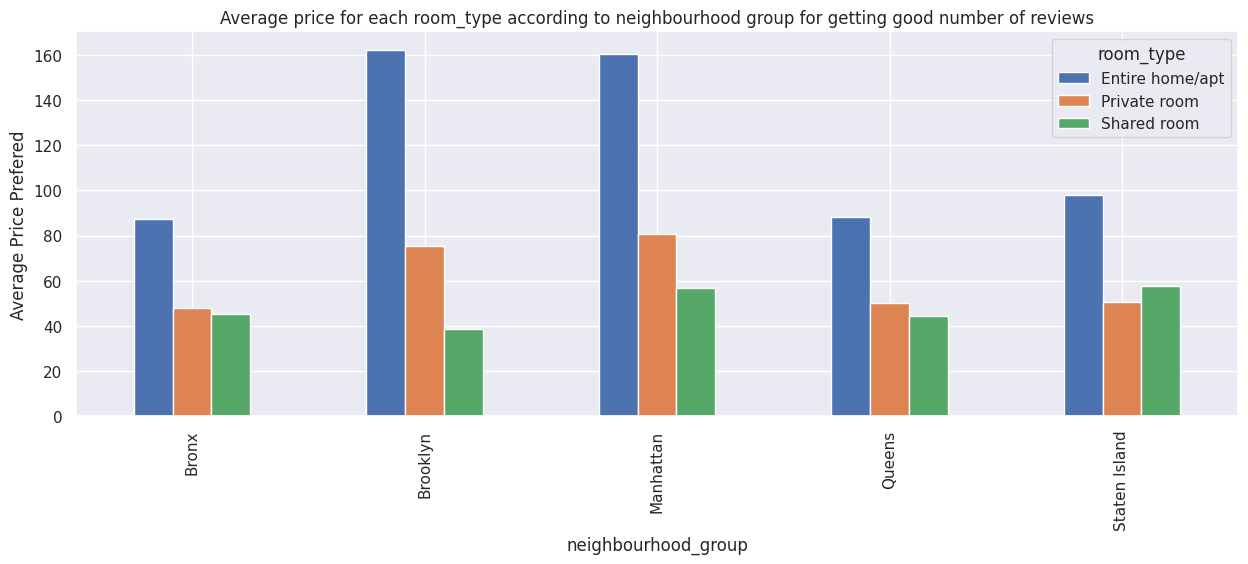

In [ ]:
avg_preffered_price_df.plot.bar(figsize=(15,5),ylabel='Average Price Prefered')
plt.title("Average price for each room_type according to neighbourhood group for getting good number of reviews")

**OBSERVATIONS**

**1) Clearly if we compare the results with previous result (i.e when we calculated average price preferred by people in each neighbourhood_group with different room_types) we can see that this result is bit different and more useful.**

**2) As an analyst we would suggest to keep price in this range to get more number of reviews in specific room type and at a particular place**

# **Conclusions:**

1) the majority of listings falling in the price range of 50 to 150 dollars.

2) Sonder(NYC) host is having most number of listings on Airbnb in NYC.

3) Bedford-Stuyvesant neighbourhood have maximum number of properties on airbnb.

4) Financial District, Chelsea and Long Island City are the neighbourhoods which have costliest listing in NYC.

5) Bedford-Stuyvesant neighbourhood has highest number of total reviews and highest number of reviews_per_month.

6) Maximum listings are listed on Manhattan and Brooklyn neighbourhood_groups. Staten Island and Bronx neighbourhood_group have very less numbers of listings.

7) Most of the listings on Airbnb in NYC are either Entire Home/Apartment or Private Room. The people who prefer to stay in entire home/apartment are likely going to stay longer, whereas people who prefer to stay in private_room are likely to stay for a shorter period of time than the people who prefer to stay in entire home/apartment.

8) Brooklyn and Manhattan have the largest number of hosts. Staten Island and Bronx neighbourhood_group have very less numbers of hosts.

9) The number of listings with a minimum stay requirement decreases as the length of stay increases.

10) Price listing for manhattan is most costly and for bronx is cheap for each room_type.

11) Average prices of all the room_types in Manhattan are more than the average price of each room_type in other neighbourhood_group. Average prices of all the room_type in Bronx neighbourhood_group is less than all the other neighbourhood_groups.